In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [5]:
df = pd.read_csv('canada_per_capita_income.csv')

In [6]:
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [8]:
df.describe()

,year,income
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [9]:
df.iloc[:, 0].values

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

In [10]:
#division of data among features and target
x = df.iloc[:, 0].values.reshape(-1,1) # all rows and one column
y = df.iloc[:, 1].values

In [11]:
x

array([[1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]], dtype=int64)

In [12]:
y

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

In [13]:
x.shape

(47, 1)

In [14]:
y.shape

(47,)

# Visualization

In [15]:
# seperate the training and testing data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
plt.rcParams['font.size'] = 12

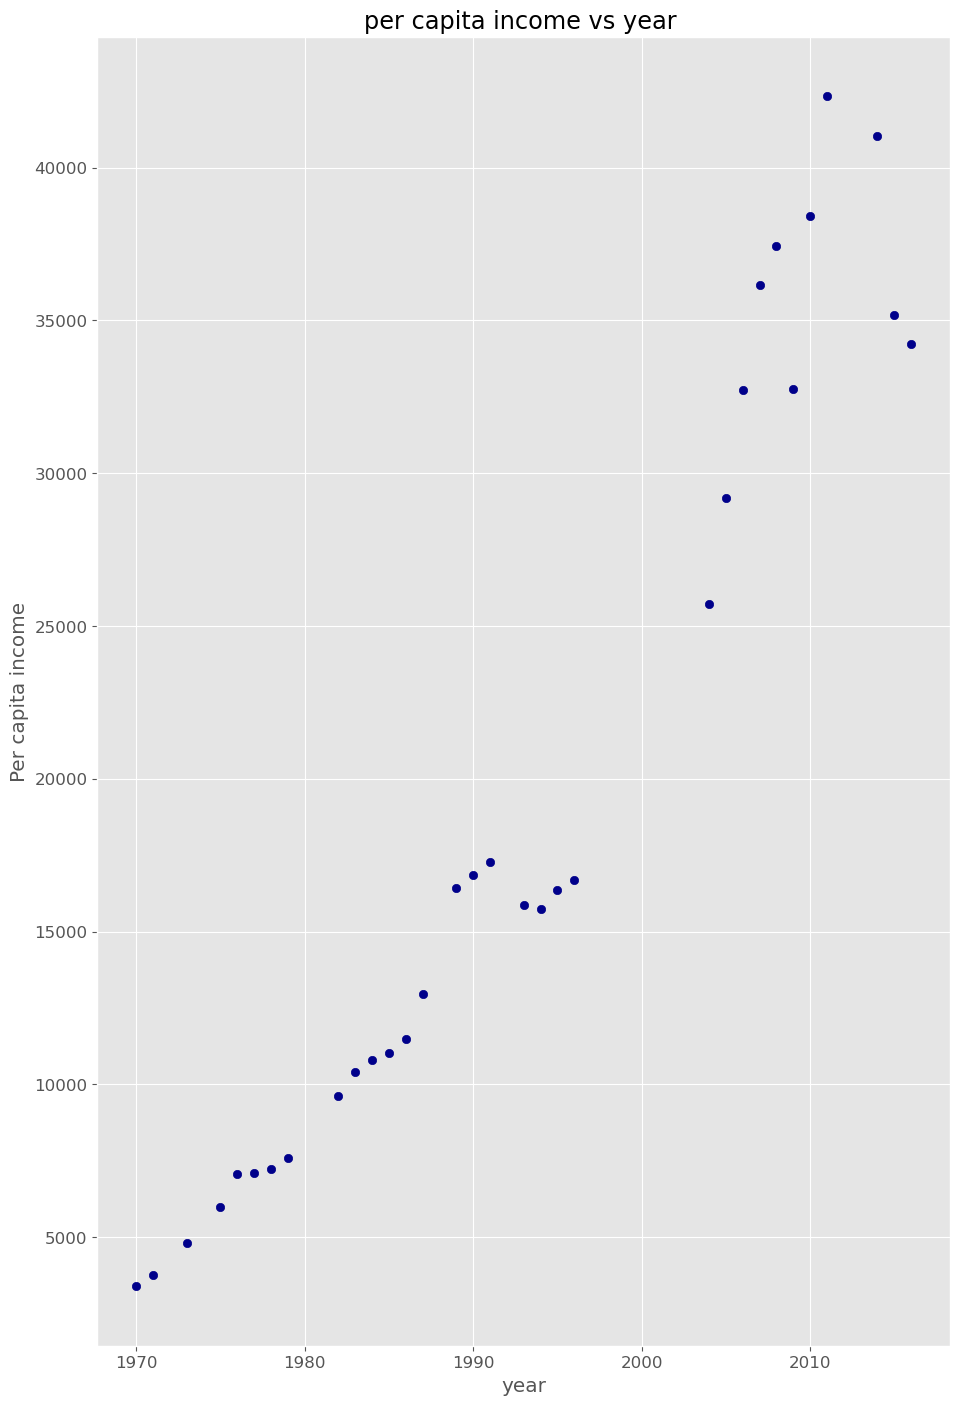

In [17]:
plt.figure(figsize = (11,17))
plt.scatter(x_train, y_train, c='darkblue')
plt.title("per capita income vs year ")
plt.xlabel("year")
plt.ylabel("Per capita income")
plt.show()

In [18]:
#create model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
#slope coefficient
model.coef_

array([847.51723132])

In [20]:
# Intercept 
model.intercept_

-1669472.865154086

In [21]:
# Make prediction on test set
y_pred = model.predict(x_test)

In [22]:
y_pred

array([23866.56302985, 28104.14918647, 25561.5974925 ,  3526.14947809,
       15391.39071662,  9458.77009735, 35731.80426838, 26409.11472382,
       18781.45964191,  8611.25286603, 23019.04579853, 27256.63195514,
       24714.08026117, 36579.3214997 ,  1831.11501545])

In [23]:
y_pred.shape

(15,)

In [32]:
y_test.size

15

In [25]:
model.predict([[2010]])

array([34036.76980573])

# visualize with regression line

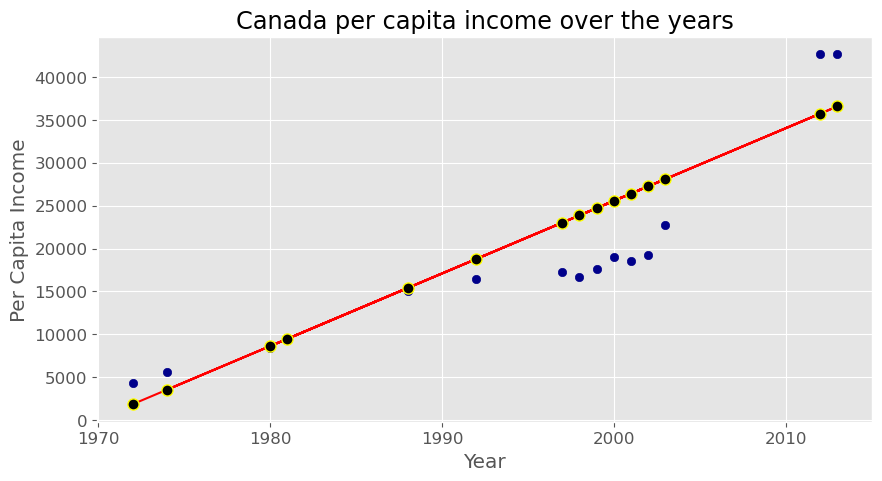

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(x_test,y_test, c='darkblue')
plt.plot(x_test,y_pred,c='red',marker='o',markersize = 8,mec ='yellow',mfc = 'black')
plt.title('Canada per capita income over the years')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.show()

In [27]:
model.predict([[1980]])

array([8611.25286603])

In [28]:
r2_score(y_test, y_pred)

0.7537443860326112

In [29]:
print("MAE :", mean_absolute_error(y_test,y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

MAE : 4554.501290185437
MSE : 28958469.97293359


In [30]:
model.score(x_train, y_train)

0.9347618353344098

In [31]:
model.score(x_test, y_test)

0.7537443860326112